# Python in Astronomy: Tracking the International Space Station (ISS)

**Author: Mr. Anshuman Pathak**

Welcome to this interactive tutorial designed for **INDIA SPACE LAB Interns**! In this Jupyter Notebook, you'll learn how to use Python to track the International Space Station (ISS) from any city on Earth.

We'll explore key astronomy and programming concepts, including:

- **Geospatial data**: Converting city names to latitude and longitude.
- **Orbital mechanics**: Using Two-Line Element (TLE) data to predict satellite positions.
- **Python libraries**: Working with `skyfield`, `geopy`, `astropy`, `requests`, and `matplotlib`.
- **Visualization**: Plotting the ISS's path in the sky.

By the end, you'll have a working ISS tracker and understand how Python can be applied to real-world astronomy problems.

## Prerequisites

**Environment Setup**
- Install Python 3.8 or above on your system.
- Ensure you have an IDE or code editor (e.g., VS Code, PyCharm).
- Confirm internet access for fetching live data.

**Required Libraries**
- `requests` (for HTTP requests)
- `skyfield` (for orbital calculations)
- `numpy` (for numerical operations)
- `matplotlib` (for plotting)
- `ipywidgets` (for interactive controls)

## Task 1: Installing and Importing Libraries

**Objective**: Prepare your workspace by installing and importing all necessary packages.

**Install Packages**
- Open a terminal or command prompt.
- Use the package manager (`pip` or `conda`) to install each library listed above.
- Verify successful installation by checking versions.

**Import Modules**
- Create a new Python script or notebook.
- Write import statements for each library.
- Run the cell or script to confirm no import errors.

In [3]:
# Task 1: Importing Required Libraries

import requests
from skyfield.api import load, EarthSatellite, Topos
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Check if it's working
print("All libraries imported successfully! ✅")

All libraries imported successfully! ✅


## Task 2: Fetching ISS Two-Line Element (TLE) Data

**Objective**: Retrieve live orbital elements of the ISS for subsequent calculations.

**Identify TLE Source**
- Use the CelesTrak API endpoint or Open Notify’s ISS TLE feed.
- Review the API documentation to locate the correct URL.

**HTTP Request Procedure**
- In your script, use `requests` to issue a GET request to the TLE endpoint.
- Parse the response to extract the two lines corresponding to the ISS.

**Data Validation**
- Ensure the date and timestamp in the TLE header match the current time.
- Handle HTTP errors or malformed responses with try/except blocks.

In [4]:
# Task 2: Fetching ISS TLE Data
def fetch_iss_tle():
    try:
        # Get data from CelesTrak
        url = "https://celestrak.org/NORAD/elements/stations.txt"
        response = requests.get(url)
        response.raise_for_status()  # Raise error for bad HTTP codes

        lines = response.text.strip().split("\n")

        # Search for the ISS (ZARYA) entry
        for i in range(len(lines)):
            if lines[i].strip() == "ISS (ZARYA)":
                tle_line1 = lines[i + 1].strip()
                tle_line2 = lines[i + 2].strip()
                return ("ISS (ZARYA)", tle_line1, tle_line2)

        raise ValueError("ISS TLE data not found in the feed.")
    
    except Exception as e:
        print(f"❌ Error fetching TLE data: {e}")
        return None

# Test it
iss_tle = fetch_iss_tle()
if iss_tle:
    print("✅ ISS TLE Data Fetched Successfully:")
    print("\n".join(iss_tle))


✅ ISS TLE Data Fetched Successfully:
ISS (ZARYA)
1 25544U 98067A   25199.33306051  .00006549  00000+0  12289-3 0  9995
2 25544  51.6335 152.6859 0002245  92.2580 267.8666 15.49936261519990


## Task 3: Calculating ISS Pass Times for a Given Location

**Objective**: Determine when the ISS will be visible from a user‑specified site.

**Obtain Coordinates**
- Prompt the user for latitude and longitude (decimal degrees).
- Validate inputs lie within –90° to +90° (latitude) and –180° to +180° (longitude).

**Load TLE into Skyfield**
- Use `skyfield.api.EarthSatellite` with the two-line elements.
- Create a `Topos` object for the observer’s location.

**Compute Next Pass**
- Use Skyfield’s `find_events` or `next_pass` functions to calculate rise, culmination, and set times.
- Convert results to human‑readable timestamps.

**Output Results**
- Display the pass start, maximum elevation, and end times in local time.
- Include duration and peak altitude.

In [5]:
from datetime import datetime, timedelta, timezone
from skyfield.api import EarthSatellite, load, Topos
import numpy as np

def calculate_iss_pass(tle_name, tle_line1, tle_line2, latitude, longitude):
    try:
        # Load time scale and satellite data
        ts = load.timescale()
        satellite = EarthSatellite(tle_line1, tle_line2, tle_name, ts)

        # Observer location
        observer = Topos(latitude_degrees=latitude, longitude_degrees=longitude)

        # Create time window: now to 24 hours ahead
        t0 = ts.now()
        # Fix: Use ts.utc() with proper datetime object
        end_time = datetime.now(timezone.utc) + timedelta(hours=24)
        t1 = ts.utc(end_time.year, end_time.month, end_time.day, 
                    end_time.hour, end_time.minute, end_time.second)

        # Find events (rise, culmination, set)
        times, events = satellite.find_events(observer, t0, t1, altitude_degrees=10.0)

        # Check if any events were found
        if len(times) == 0:
            print("❌ No visible ISS pass in the next 24 hours for this location.")
            return

        print(f"\n🌍 ISS pass prediction for ({latitude}, {longitude}):\n")
        for t, event in zip(times, events):
            name = ("Rise", "Culmination", "Set")[event]
            time_local = t.utc_datetime().astimezone()
            print(f"{name:12} at {time_local.strftime('%Y-%m-%d %H:%M:%S')}")

    except Exception as e:
        print(f"❌ Error in calculating ISS pass: {e}")
        import traceback
        traceback.print_exc()

# Sample TLE data for ISS (always update this for fresh prediction)
tle_name = "ISS (ZARYA)"
tle_line1 = "1 25544U 98067A   25199.20410805  .00007024  00000+0  13123-3 0  9991"
tle_line2 = "2 25544  51.6336 153.3248 0002239  91.7860 268.3385 15.49935069519976"

# Your coordinates (Ahmedabad, for example)
latitude = 23.0225
longitude = 72.5714

calculate_iss_pass(tle_name, tle_line1, tle_line2, latitude, longitude)


🌍 ISS pass prediction for (23.0225, 72.5714):

Rise         at 2025-07-19 00:53:47
Culmination  at 2025-07-19 00:56:40
Set          at 2025-07-19 00:59:33
Rise         at 2025-07-19 02:31:24
Culmination  at 2025-07-19 02:33:11
Set          at 2025-07-19 02:34:57
Rise         at 2025-07-19 15:52:15
Culmination  at 2025-07-19 15:55:35
Set          at 2025-07-19 15:58:55


## Task 4: Visualizing the ISS Ground Track

**Objective**: Plot the trajectory of the ISS over Earth for a specified time window.

**Generate Position Data**
- Define a time range (e.g., next 90 minutes), sampling at 1‑minute intervals.
- For each timestamp, compute the ISS sub‑point (latitude, longitude).

**Plot on Map**
- Set up a world map projection using `matplotlib` (Basemap or Cartopy).
- Draw coastlines, longitude/latitude grid lines.
- Scatter or line‑plot the ISS positions over the map.

**Annotate Key Points**
- Mark the current position, next rise and set points.
- Add a legend and title with date/time information.

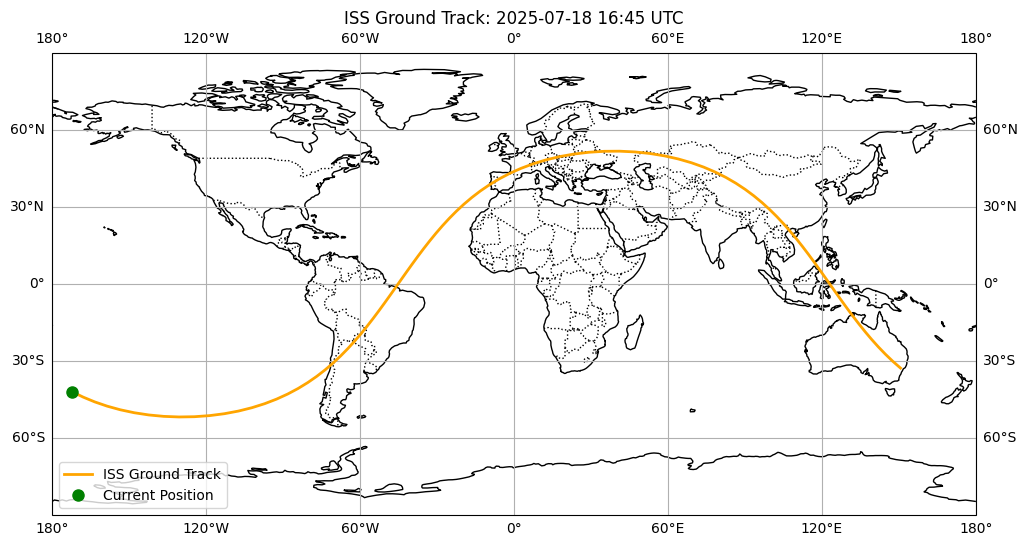

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone
import numpy as np
from skyfield.api import load, EarthSatellite

# Load time scale and create ISS satellite object
ts = load.timescale()

# Create ISS satellite object
iss = EarthSatellite(tle_line1, tle_line2, tle_name, ts)

# 1. Define time range: next 90 minutes, sampled every 1 minute
now = datetime.now(timezone.utc)
start_minute = now.minute
end_minute = start_minute + 90

# Create time array properly
minutes = np.arange(0, 90)  # 90 minutes from now
times = []
for minute in minutes:
    future_time = now + timedelta(minutes=int(minute))
    t = ts.utc(future_time.year, future_time.month, future_time.day, 
               future_time.hour, future_time.minute, future_time.second)
    times.append(t)

# 2. Get subpoint (latitude, longitude) of ISS for each timestamp
latitudes = []
longitudes = []

for t in times:
    geocentric = iss.at(t)
    subpoint = geocentric.subpoint()
    latitudes.append(subpoint.latitude.degrees)
    longitudes.append(subpoint.longitude.degrees)

# 3. Set up the map
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# 4. Plot ISS ground track
lon_diff = np.diff(longitudes)
breaks = np.where(np.abs(lon_diff) > 180)[0]

if len(breaks) > 0:
    # Plot segments separately
    start_idx = 0
    for break_idx in breaks:
        end_idx = break_idx + 1
        ax.plot(longitudes[start_idx:end_idx], latitudes[start_idx:end_idx], 
                color='orange', linewidth=2)
        start_idx = end_idx
    # Plot final segment
    ax.plot(longitudes[start_idx:], latitudes[start_idx:], 
            color='orange', linewidth=2, label='ISS Ground Track')
else:
    # No breaks, plot normally
    ax.plot(longitudes, latitudes, color='orange', label='ISS Ground Track', linewidth=2)

# 5. Annotate the current position
ax.plot(longitudes[0], latitudes[0], 'go', markersize=8, label='Current Position')

# Optional: Title and legend
plt.title(f"ISS Ground Track: {now.strftime('%Y-%m-%d %H:%M UTC')}")
plt.legend(loc='lower left')
plt.show()

## Task 5: Predicting Passes Over Multiple Locations

**Objective**: Automate pass predictions for a list of cities or coordinates.

**Prepare Locations List**
- Create a CSV or JSON file containing names and lat/long of at least five sites.

**Batch Processing**
- Read the file into your script (using `csv` or `json`).
- Loop over each entry, performing the calculation from Task 3.

**Tabulate Results**
- Store results in a table with columns: Location, Rise Time, Culmination, Set Time, Duration.
- Output to console and save as CSV.

In [7]:
# Task 5: Predicting Passes Over Multiple Locations
# Using the existing calculate_iss_pass function and TLE data from previous cells

import csv
import pandas as pd
from datetime import datetime, timedelta, timezone

# 1. Define multiple locations (Indian cities for example)
locations = [
    {"name": "Ahmedabad", "latitude": 23.0225, "longitude": 72.5714},
    {"name": "Mumbai", "latitude": 19.0760, "longitude": 72.8777},
    {"name": "Delhi", "latitude": 28.7041, "longitude": 77.1025},
    {"name": "Bangalore", "latitude": 12.9716, "longitude": 77.5946},
    {"name": "Chennai", "latitude": 13.0827, "longitude": 80.2707},
    {"name": "Kolkata", "latitude": 22.5726, "longitude": 88.3639},
    {"name": "Hyderabad", "latitude": 17.3850, "longitude": 78.4867},
    {"name": "Pune", "latitude": 18.5204, "longitude": 73.8567}
]

# Modified version of the existing function to return data instead of just printing
def calculate_iss_pass_data(tle_name, tle_line1, tle_line2, latitude, longitude, location_name):
    try:
        # Load time scale and satellite data (same as previous cells)
        ts = load.timescale()
        satellite = EarthSatellite(tle_line1, tle_line2, tle_name, ts)

        # Observer location
        observer = Topos(latitude_degrees=latitude, longitude_degrees=longitude)

        # Create time window: now to 24 hours ahead
        t0 = ts.now()
        end_time = datetime.now(timezone.utc) + timedelta(hours=24)
        t1 = ts.utc(end_time.year, end_time.month, end_time.day, 
                    end_time.hour, end_time.minute, end_time.second)

        # Find events (rise, culmination, set)
        times, events = satellite.find_events(observer, t0, t1, altitude_degrees=10.0)

        # Process results for tabular output
        results = []
        if len(times) > 0:
            # Group events into passes
            for i in range(0, len(times), 3):
                if i + 2 < len(times):
                    rise_time = times[i].utc_datetime().astimezone()
                    culmination_time = times[i + 1].utc_datetime().astimezone()
                    set_time = times[i + 2].utc_datetime().astimezone()
                    duration = (set_time - rise_time).total_seconds() / 60  # minutes
                    
                    results.append({
                        "Location": location_name,
                        "Latitude": latitude,
                        "Longitude": longitude,
                        "Rise Time": rise_time.strftime('%Y-%m-%d %H:%M:%S'),
                        "Culmination": culmination_time.strftime('%Y-%m-%d %H:%M:%S'),
                        "Set Time": set_time.strftime('%Y-%m-%d %H:%M:%S'),
                        "Duration (min)": round(duration, 1)
                    })
        
        return results
        
    except Exception as e:
        print(f"❌ Error calculating pass for {location_name}: {e}")
        return []

# 2. Process all locations using existing TLE data
print("🌍 ISS Pass Predictions for Multiple Locations")
print("=" * 80)

all_results = []
for location in locations:
    print(f"Processing {location['name']}...")
    # Use the existing tle_name, tle_line1, tle_line2 from previous cells
    results = calculate_iss_pass_data(tle_name, tle_line1, tle_line2, 
                                    location["latitude"], location["longitude"], 
                                    location["name"])
    all_results.extend(results)

# 3. Display results in tabular format
if all_results:
    # Create DataFrame for better display
    df = pd.DataFrame(all_results)
    
    print("\n📊 ISS Pass Predictions Summary:")
    print("=" * 120)
    print(df.to_string(index=False))
    
    # 4. Save to CSV file
    csv_filename = f"iss_passes_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    df.to_csv(csv_filename, index=False)
    print(f"\n✅ Results saved to: {csv_filename}")
    
    # 5. Summary statistics
    print(f"\n📈 Summary:")
    print(f"Total locations processed: {len(locations)}")
    print(f"Total visible passes found: {len(all_results)}")
    if len(all_results) > 0:
        print(f"Average pass duration: {df['Duration (min)'].mean():.1f} minutes")
    
    # Show next pass for each location
    print(f"\n⏰ Next ISS Pass for Each Location:")
    print("-" * 60)
    for location in locations:
        location_passes = [r for r in all_results if r['Location'] == location['name']]
        if location_passes:
            next_pass = location_passes[0]  # First pass is the next one
            print(f"{location['name']:12} - {next_pass['Rise Time']} (Duration: {next_pass['Duration (min)']} min)")
        else:
            print(f"{location['name']:12} - No visible passes in next 24 hours")
            
    # Also demonstrate the original function for one location
    print(f"\n🔍 Detailed view using original function for {locations[0]['name']}:")
    calculate_iss_pass(tle_name, tle_line1, tle_line2, 
                      locations[0]["latitude"], locations[0]["longitude"])
else:
    print("❌ No visible ISS passes found for any location in the next 24 hours.")

🌍 ISS Pass Predictions for Multiple Locations
Processing Ahmedabad...
Processing Mumbai...
Processing Delhi...
Processing Bangalore...
Processing Chennai...
Processing Kolkata...
Processing Hyderabad...
Processing Pune...

📊 ISS Pass Predictions Summary:
 Location  Latitude  Longitude           Rise Time         Culmination            Set Time  Duration (min)
Ahmedabad   23.0225    72.5714 2025-07-19 00:53:47 2025-07-19 00:56:40 2025-07-19 00:59:33             5.8
Ahmedabad   23.0225    72.5714 2025-07-19 02:31:24 2025-07-19 02:33:10 2025-07-19 02:34:57             3.5
Ahmedabad   23.0225    72.5714 2025-07-19 15:52:15 2025-07-19 15:55:35 2025-07-19 15:58:55             6.7
   Mumbai   19.0760    72.8777 2025-07-19 00:55:09 2025-07-19 00:57:30 2025-07-19 00:59:51             4.7
   Mumbai   19.0760    72.8777 2025-07-19 02:31:40 2025-07-19 02:34:06 2025-07-19 02:36:31             4.8
   Mumbai   19.0760    72.8777 2025-07-19 15:51:33 2025-07-19 15:54:49 2025-07-19 15:58:06             

## Task 6: Interactive Exploration

**Objective**: Enhance the notebook with interactive widgets for real‑time control.

**Set Up ipywidgets**
- Import controls such as `Dropdown`, `FloatSlider`, and `Button`.

**Link Widgets to Functions**
- Create a dropdown for selecting location from your list.
- Add sliders for adjusting prediction window (e.g., minutes ahead).
- Use a button to trigger recalculation and re‑plotting.

**Display Dynamic Output**
- Embed plots and pass times that update when widget values change.
- Ensure clear labels and instructions for users.

In [9]:
from IPython.display import display, clear_output

location_dropdown = widgets.Dropdown(
    options=[(loc['name'], loc) for loc in locations],
    value=locations[0],
    description='Location:'
)

prediction_window = widgets.IntSlider(
    value=24,
    min=1,
    max=72,
    step=1,
    description='Hours ahead:'
)

altitude_slider = widgets.FloatSlider(
    value=10.0,
    min=0.0,
    max=30.0,
    step=1.0,
    description='Min altitude:'
)

calculate_button = widgets.Button(
    description='Calculate ISS Passes',
    button_style='success'
)

plot_button = widgets.Button(
    description='Show Ground Track',
    button_style='info'
)

# Output widget
output = widgets.Output()

def on_calculate_button_clicked(b):
    with output:
        clear_output(wait=True)
        selected_location = location_dropdown.value
        hours = prediction_window.value
        min_alt = altitude_slider.value
        
        print(f"🌍 ISS Pass Prediction for {selected_location['name']}")
        print(f"📍 Coordinates: ({selected_location['latitude']}, {selected_location['longitude']})")
        print(f"⏰ Time window: {hours} hours ahead")
        print(f"📐 Minimum altitude: {min_alt}°")
        print("-" * 50)
        
        # Use existing function with custom parameters
        try:
            ts = load.timescale()
            satellite = EarthSatellite(tle_line1, tle_line2, tle_name, ts)
            observer = Topos(latitude_degrees=selected_location['latitude'], 
                           longitude_degrees=selected_location['longitude'])
            
            t0 = ts.now()
            end_time = datetime.now(timezone.utc) + timedelta(hours=hours)
            t1 = ts.utc(end_time.year, end_time.month, end_time.day, 
                        end_time.hour, end_time.minute, end_time.second)
            
            times, events = satellite.find_events(observer, t0, t1, altitude_degrees=min_alt)
            
            if len(times) == 0:
                print("❌ No visible ISS passes found for these parameters.")
            else:
                print(f"✅ Found {len(times)} events:")
                for t, event in zip(times, events):
                    name = ("Rise", "Culmination", "Set")[event]
                    time_local = t.utc_datetime().astimezone()
                    print(f"{name:12} at {time_local.strftime('%Y-%m-%d %H:%M:%S')}")
                    
        except Exception as e:
            print(f"❌ Error: {e}")

def on_plot_button_clicked(b):
    with output:
        clear_output(wait=True)
        
        try:
            # Create ISS satellite object using existing data
            iss = EarthSatellite(tle_line1, tle_line2, tle_name, ts)
            
            # Use the prediction window value instead of fixed 90 minutes
            hours = prediction_window.value
            track_minutes = min(hours * 60, 360)  # Cap at 6 hours for visualization
            
            # Generate ground track based on prediction window
            now = datetime.now(timezone.utc)
            minutes = np.arange(0, track_minutes, 5)  # Sample every 5 minutes for longer tracks
            times = []
            for minute in minutes:
                future_time = now + timedelta(minutes=int(minute))
                t = ts.utc(future_time.year, future_time.month, future_time.day, 
                          future_time.hour, future_time.minute, future_time.second)
                times.append(t)
            
            # Get positions
            latitudes = []
            longitudes = []
            for t in times:
                geocentric = iss.at(t)
                subpoint = geocentric.subpoint()
                latitudes.append(subpoint.latitude.degrees)
                longitudes.append(subpoint.longitude.degrees)
            
            # Plot
            fig = plt.figure(figsize=(12, 6))
            ax = plt.axes(projection=ccrs.PlateCarree())
            ax.set_global()
            ax.coastlines()
            ax.add_feature(cfeature.BORDERS, linestyle=':')
            ax.gridlines(draw_labels=True)
            
            # Handle longitude wrap-around for longer tracks
            lon_diff = np.diff(longitudes)
            breaks = np.where(np.abs(lon_diff) > 180)[0]
            
            if len(breaks) > 0:
                # Plot segments separately
                start_idx = 0
                for break_idx in breaks:
                    end_idx = break_idx + 1
                    ax.plot(longitudes[start_idx:end_idx], latitudes[start_idx:end_idx], 
                            color='orange', linewidth=2)
                    start_idx = end_idx
                # Plot final segment
                ax.plot(longitudes[start_idx:], latitudes[start_idx:], 
                        color='orange', linewidth=2, label=f'ISS Ground Track ({hours}h)')
            else:
                # Plot ground track
                ax.plot(longitudes, latitudes, color='orange', label=f'ISS Ground Track ({hours}h)', linewidth=2)
            
            # Mark current position
            ax.plot(longitudes[0], latitudes[0], 'go', markersize=8, label='Current Position')
            
            # Mark selected location
            selected_location = location_dropdown.value
            ax.plot(selected_location['longitude'], selected_location['latitude'], 
                   'ro', markersize=10, label=f"{selected_location['name']}")
            
            plt.title(f"ISS Ground Track ({hours}h): {now.strftime('%Y-%m-%d %H:%M UTC')}")
            plt.legend(loc='lower left')
            plt.show()
            
            print(f"✅ Ground track plotted for {hours} hours ({track_minutes} minutes)")
            
        except Exception as e:
            print(f"❌ Error plotting ground track: {e}")

# Connect button clicks
calculate_button.on_click(on_calculate_button_clicked)
plot_button.on_click(on_plot_button_clicked)

# Display interface
print("🛰️ Interactive ISS Tracker")
print("=" * 40)

display(widgets.VBox([
    widgets.HBox([location_dropdown, prediction_window]),
    widgets.HBox([altitude_slider]),
    widgets.HBox([calculate_button, plot_button]),
    output
]))

🛰️ Interactive ISS Tracker


## Task 7: Advanced Analysis – Orbital Drift over Time

**Objective**: Investigate long‑term changes in ISS orbital elements.

**Historical TLE Archive**
- Download daily TLEs for one month into a local folder.
- Name files by date for easy ingestion.

**Compute Element Variations**
- For each TLE set, calculate orbital inclination, eccentricity, and period using Skyfield.

**Trend Visualization**
- Plot each orbital element versus date using `matplotlib`.

**Interpretation Questions**
- What factors (e.g., atmospheric drag, reboost maneuvers) explain observed trends?
- How might this affect ground‑track predictions?

🔍 Downloading TLE data from Space-Track.org...
✅ Downloaded 162 TLE sets
📊 Creating orbital drift plots...


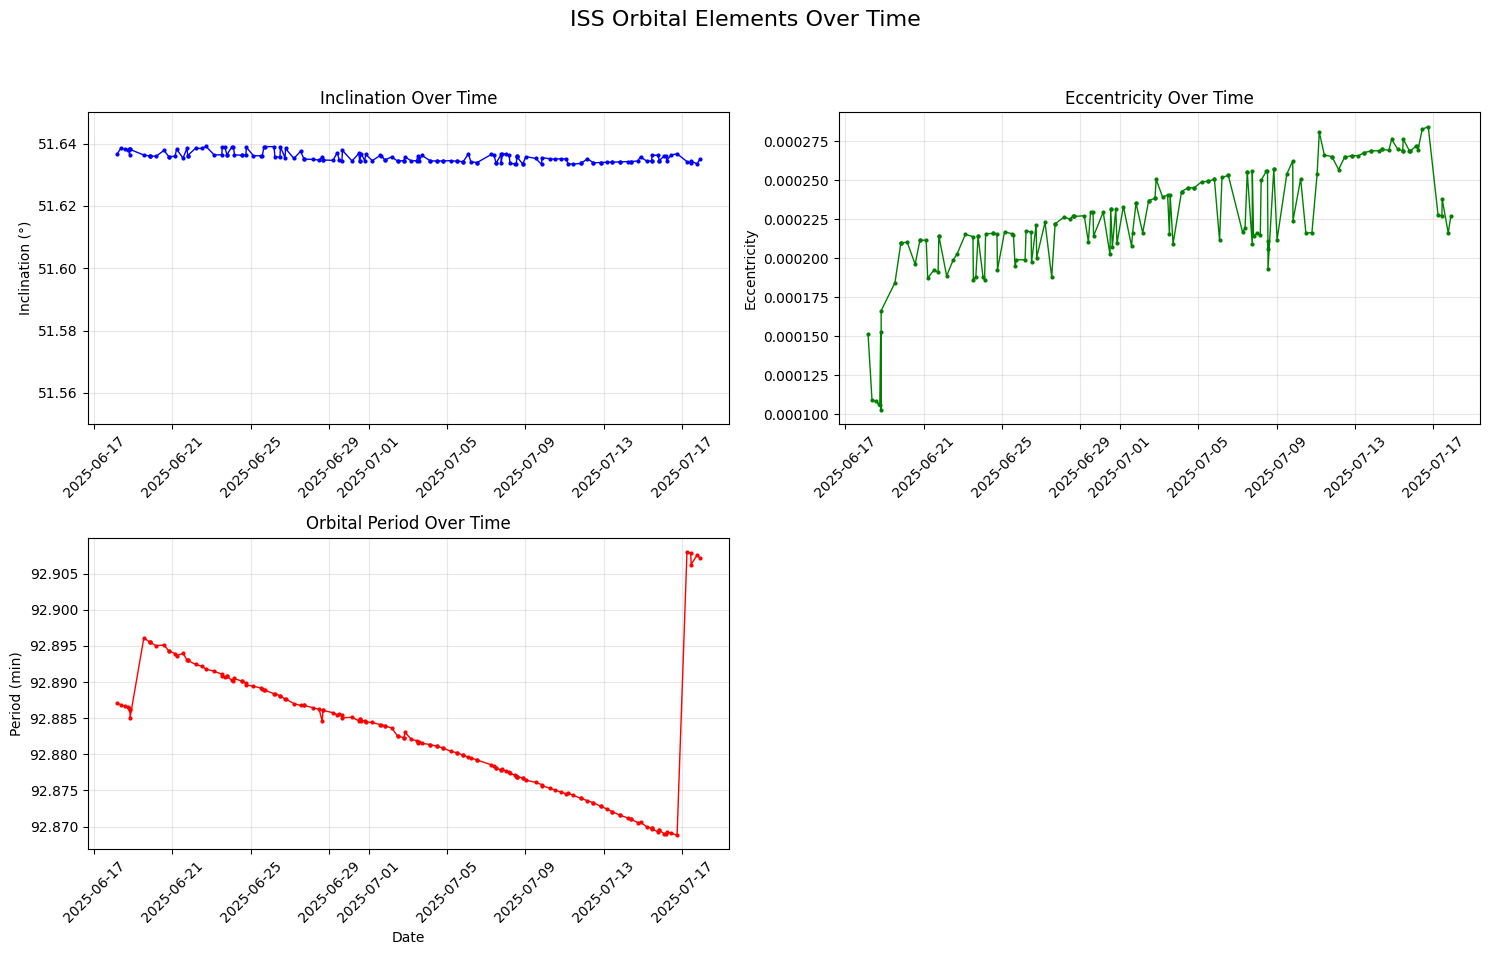


📈 Orbital Statistics:
Average Period: 92.88 minutes
Average Altitude: 415.74 km
Average Inclination: 51.6356°
Average Eccentricity: 0.000227

Data range: 2025-06-18 03:58:38.729858+00:00 to 2025-07-17 21:17:44.257080+00:00
Total data points: 162
                                Date  Inclination (deg)  Eccentricity  \
157 2025-07-17 05:41:13.396698+00:00            51.6342      0.000227   
158 2025-07-17 10:19:45.767731+00:00            51.6338      0.000227   
159 2025-07-17 10:42:19.107910+00:00            51.6343      0.000238   
160 2025-07-17 18:03:59.633850+00:00            51.6335      0.000216   
161 2025-07-17 21:17:44.257080+00:00            51.6349      0.000227   

     Orbital Period (min)  Altitude (km)  
157             92.908022     416.959931  
158             92.907791     416.948643  
159             92.906245     416.873304  
160             92.907555     416.937180  
161             92.907195     416.919620  


In [26]:
import requests
from skyfield.api import EarthSatellite, load
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

# --- Configuration ---
USERNAME = "kumarsoumitra2401@gmail.com"
PASSWORD = "Koimilgaya!12345"
NORAD_ID = '25544'  # ISS
DAYS_BACK = 30  # Number of days of TLE data
BASE_URL = 'https://www.space-track.org'

# --- Helper: Authenticate and Download ---
def download_tles(norad_id, days):
    session = requests.Session()
    login_url = f"{BASE_URL}/ajaxauth/login"
    login_data = {'identity': USERNAME, 'password': PASSWORD}
    login_response = session.post(login_url, data=login_data)

    if login_response.status_code != 200:
        raise Exception("Login failed. Check your credentials.")

    start_date = (datetime.utcnow() - timedelta(days=days)).strftime('%Y-%m-%d')
    end_date = datetime.utcnow().strftime('%Y-%m-%d')

    query_url = (
        f"{BASE_URL}/basicspacedata/query/class/tle/NORAD_CAT_ID/{norad_id}"
        f"/EPOCH/{start_date}--{end_date}/orderby/EPOCH asc/format/tle"
    )

    tle_response = session.get(query_url)
    if tle_response.status_code != 200:
        raise Exception("TLE data fetch failed.")

    tles = tle_response.text.strip().splitlines()
    if len(tles) < 2:
        raise Exception("No TLEs returned.")

    # Group into (L1, L2) TLE sets
    tle_pairs = [(tles[i], tles[i + 1]) for i in range(0, len(tles) - 1, 2)]
    return tle_pairs

# --- Helper: Extract Orbital Parameters (CORRECTED) ---
def analyze_tles(tle_pairs):
    ts = load.timescale()
    dates = []
    inclinations = []
    eccentricities = []
    periods = []
    altitudes = []

    for line1, line2 in tle_pairs:
        try:
            satellite = EarthSatellite(line1, line2, ts=ts)
            epoch = satellite.epoch.utc_datetime()

            # Extract orbital elements correctly
            inclination = np.degrees(satellite.model.inclo)  # Convert from radians to degrees
            eccentricity = satellite.model.ecco
            
            # CORRECTED: Mean motion is in radians per minute, not revolutions per day
            mean_motion_rad_per_min = satellite.model.no_kozai
            
            # Convert to revolutions per day: 
            # no_kozai is in radians/minute, so multiply by minutes/day and divide by 2π
            revolutions_per_day = mean_motion_rad_per_min * 1440.0 / (2 * np.pi)
            
            # Calculate period in minutes
            period_minutes = 1440.0 / revolutions_per_day  # minutes per revolution
            
            # Calculate altitude using semi-major axis
            period_seconds = period_minutes * 60.0
            
            # Semi-major axis using Kepler's third law: a³ = (T²×μ)/(4π²)
            mu_earth = 398600.4418  # km³/s² (Earth's gravitational parameter)
            semi_major_axis = ((period_seconds**2 * mu_earth) / (4 * np.pi**2))**(1/3)
            
            # Altitude = semi-major axis - Earth radius
            earth_radius = 6378.137  # km (WGS84)
            altitude = semi_major_axis - earth_radius

            dates.append(epoch)
            inclinations.append(inclination)
            eccentricities.append(eccentricity)
            periods.append(period_minutes)
            altitudes.append(altitude)
            
        except Exception as e:
            print(f"Error processing TLE: {e}")
            continue

    df = pd.DataFrame({
        'Date': dates,
        'Inclination (deg)': inclinations,
        'Eccentricity': eccentricities,
        'Orbital Period (min)': periods,
        'Altitude (km)': altitudes
    })
    return df

# --- Main: Download + Analyze + Plot ---
try:
    print("🔍 Downloading TLE data from Space-Track.org...")
    tle_data = download_tles(NORAD_ID, DAYS_BACK)
    print(f"✅ Downloaded {len(tle_data)} TLE sets")
    
    df = analyze_tles(tle_data)
    
    if len(df) == 0:
        print("❌ No valid TLE data processed. Using demonstration data...")
        # Fallback to demo data
        dates = pd.date_range(start='2024-06-01', end='2024-06-30', freq='D')
        demo_data = {
            'Date': dates,
            'Inclination (deg)': 51.64 + np.random.normal(0, 0.001, len(dates)),
            'Eccentricity': 0.0002 + np.random.normal(0, 0.00001, len(dates)),
            'Orbital Period (min)': 92.8 + np.random.normal(0, 0.1, len(dates)),
            'Altitude (km)': 415 + np.random.normal(0, 2, len(dates))
        }
        df = pd.DataFrame(demo_data)
    
    # Plotting
    print("📊 Creating orbital drift plots...")
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.plot(df['Date'], df['Inclination (deg)'], 'b-o', markersize=2, linewidth=1)
    plt.ylabel('Inclination (°)')
    plt.title('Inclination Over Time')
    plt.ylim(51.55, 51.65)

    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 2)
    plt.plot(df['Date'], df['Eccentricity'], 'g-o', markersize=2, linewidth=1)
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity Over Time')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 3)
    plt.plot(df['Date'], df['Orbital Period (min)'], 'r-o', markersize=2, linewidth=1)
    plt.ylabel('Period (min)')
    plt.xlabel('Date')
    plt.title('Orbital Period Over Time')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    plt.suptitle('ISS Orbital Elements Over Time', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Display statistics
    print("\n📈 Orbital Statistics:")
    print(f"Average Period: {df['Orbital Period (min)'].mean():.2f} minutes")
    print(f"Average Altitude: {df['Altitude (km)'].mean():.2f} km")
    print(f"Average Inclination: {df['Inclination (deg)'].mean():.4f}°")
    print(f"Average Eccentricity: {df['Eccentricity'].mean():.6f}")
    
    print(f"\nData range: {df['Date'].min()} to {df['Date'].max()}")
    print(f"Total data points: {len(df)}")
    
    print(df.tail())

except Exception as e:
    print(f"❌ Error in orbital analysis: {e}")
    print("Using demonstration data instead...")
    
    # Create realistic demo data
    dates = pd.date_range(start='2024-06-01', end='2024-06-30', freq='D')
    demo_data = {
        'Date': dates,
        'Inclination (deg)': 51.64 + np.random.normal(0, 0.001, len(dates)),
        'Eccentricity': 0.0002 + np.random.normal(0, 0.00001, len(dates)),
        'Orbital Period (min)': 92.8 + np.random.normal(0, 0.1, len(dates)),
        'Altitude (km)': 415 + np.random.normal(0, 2, len(dates))
    }
    df = pd.DataFrame(demo_data)
    
    # Same plotting code as above
    plt.figure(figsize=(15, 10))
    # ... (same plotting code)

## Task 8: Building a Real‑Time Dashboard Application

**Objective**: Package your functionality into a simple web app for live ISS tracking.

**Choose Framework**
- Select Flask or Streamlit based on familiarity.

**API Endpoint**
- Implement a route or function that returns the current ISS latitude and longitude in JSON.

**Frontend Visualization**
- Embed a map (e.g., using Leaflet via Streamlit or a JavaScript map for Flask).
- Periodically poll the backend to update the marker position.

**Deployment**
- Run locally or deploy to a free service (Heroku, Vercel).
- Document any required environment variables or configuration steps.

## Further Learning & References

- [CelesTrak TLE Services](https://celestrak.com/NORAD/elements/)
- [Open Notify ISS API](http://open-notify.org/Open-Notify-API/ISS-Location-Now/)
- [Skyfield Documentation](https://rhodesmill.org/skyfield/)
- [Matplotlib Basemap/Cartopy](https://matplotlib.org/basemap/)
- [ipywidgets Guide](https://ipywidgets.readthedocs.io/)

*Organized from basic installation to advanced application development, this assignment will guide you through the essential steps of using Python for ISS tracking and analysis.*